# FLIPKART SENTIMENT ANALYSIS
Using the flipkart reviews to carry out sentiment analysis and create unigram and bigram wordclouds. 

## BUSINESS OBJECTIVE
* Maximize Profit
* Minimize Churn Rate
* Maximize Service Quality

## CONSTRAINTS
* Cyber Attacks
* Fraudulent Activity

Importing the required libraries. 

In [1]:
import requests
import re
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np

__WEB SCRAPPING__

Creating empty reviews list.

In [2]:
review=[]

Adding the reviews one by one into the empty reviews list. 

In [3]:
for i in range(1,9): #Declaring the number of pages from which reviews are to be considered. 
    ip=[] # Creating an empty list to save reviews of one page at a time. 
    # The url of the review page. 
    url='https://www.flipkart.com/flipkart-perfect-homes-costello-leatherette-manual-recliner/product-reviews/itm7ac29055b6f87?pid=RECFUFRBEGBQZJBK&lid=LSTRECFUFRBEGBQZJBKCHFXGL&marketplace=FLIPKART%2F2&page='+str(i)
    response=requests.get(url) # using the request library to fetch the data from the given url. 
    soup=bs(response.content,'html.parser') #bs4 library parses the information, creating a soup object to iterate over the extracted content.
    reviews=soup.find_all("div",attrs={'class',"t-ZTKy"}) #Extracting content under specific tags
    for i in range(len(reviews)):
        ip.append(reviews[i].text)# appending the reviews one by one into ip list.
        
    review=review + ip #Adding the reviews from each page one by one. 

Joining all the reviews to form a string. 

In [4]:
review

['Confortable and easy to use. Have used for 3 months now. so far so good. Material is not outstanding but good considering the price. The mechanism to change positions works smoothly. My father is 68 years old and he loves itUpdate after 2 years usage - Spring coils have lost their strength. Heavy persons go too deep in the seat due to this. The leatherette top layer is peeling off exposing the insides.READ MORE',
 'one of my best purchase. I brought it for 5212. Its the best product of flipkart. gifted my dad and he loves it . its very comfortable and cosy.READ MORE',
 'Not up to the mark leather was very thin cushion was good comfort was good i hope i was not much durable I bought for 9000 on big billion sale thanks FlipkartREAD MORE',
 'Very good product I buyed it for my dad he loved it so much. Its very comfortable best product for relaxationREAD MORE',
 'Good product for its price , value for money. Delivery and installation were smooth and exactly as per time frame. So far, so 

In [5]:
string=" ".join(review)
string

"Confortable and easy to use. Have used for 3 months now. so far so good. Material is not outstanding but good considering the price. The mechanism to change positions works smoothly. My father is 68 years old and he loves itUpdate after 2 years usage - Spring coils have lost their strength. Heavy persons go too deep in the seat due to this. The leatherette top layer is peeling off exposing the insides.READ MORE one of my best purchase. I brought it for 5212. Its the best product of flipkart. gifted my dad and he loves it . its very comfortable and cosy.READ MORE Not up to the mark leather was very thin cushion was good comfort was good i hope i was not much durable I bought for 9000 on big billion sale thanks FlipkartREAD MORE Very good product I buyed it for my dad he loved it so much. Its very comfortable best product for relaxationREAD MORE Good product for its price , value for money. Delivery and installation were smooth and exactly as per time frame. So far, so good. Time will t

Storing all the reviews in a dataframe called df, this dataframe will be used to carry out sentiment analysis.

In [6]:
df= pd.DataFrame(columns = ["Review"])
df["Review"] = review

__DATA CLEANING__

Converting all the letters in the string to lowercase letters. 

In [7]:
text = string.lower()
text

"confortable and easy to use. have used for 3 months now. so far so good. material is not outstanding but good considering the price. the mechanism to change positions works smoothly. my father is 68 years old and he loves itupdate after 2 years usage - spring coils have lost their strength. heavy persons go too deep in the seat due to this. the leatherette top layer is peeling off exposing the insides.read more one of my best purchase. i brought it for 5212. its the best product of flipkart. gifted my dad and he loves it . its very comfortable and cosy.read more not up to the mark leather was very thin cushion was good comfort was good i hope i was not much durable i bought for 9000 on big billion sale thanks flipkartread more very good product i buyed it for my dad he loved it so much. its very comfortable best product for relaxationread more good product for its price , value for money. delivery and installation were smooth and exactly as per time frame. so far, so good. time will t

Remove single quote early since it causes problems with the tokenizer.

In [8]:
text = text.replace("'", "")
text

'confortable and easy to use. have used for 3 months now. so far so good. material is not outstanding but good considering the price. the mechanism to change positions works smoothly. my father is 68 years old and he loves itupdate after 2 years usage - spring coils have lost their strength. heavy persons go too deep in the seat due to this. the leatherette top layer is peeling off exposing the insides.read more one of my best purchase. i brought it for 5212. its the best product of flipkart. gifted my dad and he loves it . its very comfortable and cosy.read more not up to the mark leather was very thin cushion was good comfort was good i hope i was not much durable i bought for 9000 on big billion sale thanks flipkartread more very good product i buyed it for my dad he loved it so much. its very comfortable best product for relaxationread more good product for its price , value for money. delivery and installation were smooth and exactly as per time frame. so far, so good. time will t

Tokenizing.

In [9]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

Removing extra characters. 

In [10]:
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

In [11]:
text_string=' '.join(text_content)
text_string

'confortable and easy to use  have used for 3 months now  so far so good  material is not outstanding but good considering the price  the mechanism to change positions works smoothly  my father is 68 years old and he loves itupdate after 2 years usage  spring coils have lost their strength  heavy persons go too deep in the seat due to this  the leatherette top layer is peeling off exposing the insidesread more one of my best purchase  i brought it for 5212 its the best product of flipkart  gifted my dad and he loves it  its very comfortable and cosyread more not up to the mark leather was very thin cushion was good comfort was good i hope i was not much durable i bought for 9000 on big billion sale thanks flipkartread more very good product i buyed it for my dad he loved it so much  its very comfortable best product for relaxationread more good product for its price  value for money  delivery and installation were smooth and exactly as per time frame  so far  so good  time will tell if

Replacing the nice with good as both mean the same. 

In [12]:
text_string=text_string.replace('nice','good')

Removing the emoji's and extra shapes. 

In [13]:
text_content = re.sub("[^A-Za-z" "]+", " ",text_string).split()

Creating a set of stopwords.

In [14]:
stopwords_wc = set(STOPWORDS)
customised_words = ['flipkart','read','more','use','one','tb','nd','hdd','ofc','wd','hard','disk','drive','western','digital','seagate','toshiba','sony','thus','brands','inr','month','lot','ah','ago','r','w','a'] # If you want to remove any particular word form text which does not contribute much in meaning

new_stopwords = stopwords_wc.union(customised_words)

Removing the stop words

In [15]:
text_content = [word for word in text_content if word not in new_stopwords]

Taking  only non-empty entries

In [16]:
text_content = [s for s in text_content if len(s) != 0]

Carrying out lemmatization. 

In [17]:
WNL = nltk.WordNetLemmatizer()
text_content = [WNL.lemmatize(t) for t in text_content]

Again converting it back into strings.

In [18]:
text_string1=' '.join(text_content)
text_string1

'confortable easy used month now far good material outstanding good considering price mechanism change position work smoothly father year old love itupdate year usage spring coil lost strength heavy person go deep seat due leatherette top layer peeling exposing insidesread best purchase brought best product gifted dad love comfortable cosyread mark leather thin cushion good comfort good hope much durable bought big billion sale thanks flipkartread good product buyed dad loved much comfortable best product relaxationread good product price value money delivery installation smooth exactly per time frame far good time will tell product stand test time usage will update month usage paid r via credit card offer now price buy price drop againread excellent product work perfectly defect found colour material look rich royal anyone looking relaxing watching good football cricket match product good product best price cost installation leather quality improve overall good comfortread product aft

__Cleaning the reviews in the dataframe__

Checking to see if there are any empty rows. 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  80 non-null     object
dtypes: object(1)
memory usage: 768.0+ bytes


Converting the reviews into lowercase.

In [20]:
df['Review']=df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Review']

0     confortable and easy to use. have used for 3 m...
1     one of my best purchase. i brought it for 5212...
2     not up to the mark leather was very thin cushi...
3     very good product i buyed it for my dad he lov...
4     good product for its price , value for money. ...
                            ...                        
75    pathetic quality post usage. when you buy, use...
76            poor stitchesstitches are brokenread more
77                             value for moneyread more
78    third class product and also flipkart doesn’t ...
79    the material stats to peel off after regular u...
Name: Review, Length: 80, dtype: object

Removing all extra characters,numbers and emojis.

In [21]:
df['Review']=df['Review'].str.replace('[^a-z" "]+','')
df['Review']

C:\Users\lenny\AppData\Local\Temp\ipykernel_25576\374160037.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review']=df['Review'].str.replace('[^a-z" "]+','')


0     confortable and easy to use have used for  mon...
1     one of my best purchase i brought it for  its ...
2     not up to the mark leather was very thin cushi...
3     very good product i buyed it for my dad he lov...
4     good product for its price  value for money de...
                            ...                        
75    pathetic quality post usage when you buy use i...
76            poor stitchesstitches are brokenread more
77                             value for moneyread more
78    third class product and also flipkart doesnt h...
79    the material stats to peel off after regular u...
Name: Review, Length: 80, dtype: object

Replacing similar meaning words with good.

In [22]:
df['Review']=df['Review'].str.replace('nice','good')
df['Review']=df['Review'].str.replace('best','good')
df['Review']=df['Review'].str.replace('great','good')


Removing all the stopwords from the reviews.

In [23]:
df['Review']=df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in new_stopwords))
df['Review']

0     confortable easy used months now far good mate...
1     good purchase brought good product gifted dad ...
2     mark leather thin cushion good comfort good ho...
3     good product buyed dad loved much comfortable ...
4     good product price value money delivery instal...
                            ...                        
75    pathetic quality post usage buy initially look...
76                     poor stitchesstitches brokenread
77                                      value moneyread
78    third class product doesnt helping products so...
79    material stats peel regular uselong term revie...
Name: Review, Length: 80, dtype: object

### UNIGRAM WORDCLOUD

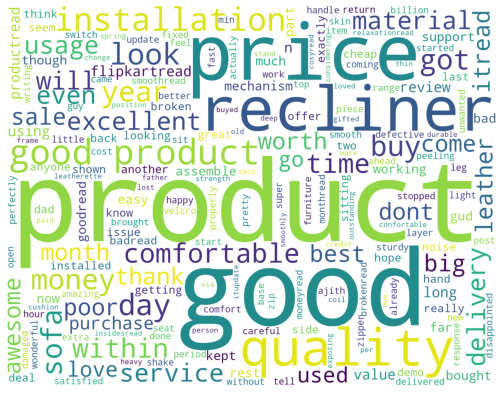

In [24]:
wordcloud_ip = WordCloud(background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_string1)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

### BIGRAM WORDCLOUD

Creating a list of bigrams using nltk library. 

In [25]:
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

[('confortable', 'easy'), ('easy', 'used'), ('used', 'month'), ('month', 'now'), ('now', 'far'), ('far', 'good'), ('good', 'material'), ('material', 'outstanding'), ('outstanding', 'good'), ('good', 'considering'), ('considering', 'price'), ('price', 'mechanism'), ('mechanism', 'change'), ('change', 'position'), ('position', 'work'), ('work', 'smoothly'), ('smoothly', 'father'), ('father', 'year'), ('year', 'old'), ('old', 'love'), ('love', 'itupdate'), ('itupdate', 'year'), ('year', 'usage'), ('usage', 'spring'), ('spring', 'coil'), ('coil', 'lost'), ('lost', 'strength'), ('strength', 'heavy'), ('heavy', 'person'), ('person', 'go'), ('go', 'deep'), ('deep', 'seat'), ('seat', 'due'), ('due', 'leatherette'), ('leatherette', 'top'), ('top', 'layer'), ('layer', 'peeling'), ('peeling', 'exposing'), ('exposing', 'insidesread'), ('insidesread', 'best'), ('best', 'purchase'), ('purchase', 'brought'), ('brought', 'best'), ('best', 'product'), ('product', 'gifted'), ('gifted', 'dad'), ('dad', '

Saving it into a dictionary to use it to create a wordcloud. 

In [26]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

['confortable easy', 'easy used', 'used month', 'month now', 'now far', 'far good', 'good material', 'material outstanding', 'outstanding good', 'good considering', 'considering price', 'price mechanism', 'mechanism change', 'change position', 'position work', 'work smoothly', 'smoothly father', 'father year', 'year old', 'old love', 'love itupdate', 'itupdate year', 'year usage', 'usage spring', 'spring coil', 'coil lost', 'lost strength', 'strength heavy', 'heavy person', 'person go', 'go deep', 'deep seat', 'seat due', 'due leatherette', 'leatherette top', 'top layer', 'layer peeling', 'peeling exposing', 'exposing insidesread', 'insidesread best', 'best purchase', 'purchase brought', 'brought best', 'best product', 'product gifted', 'gifted dad', 'dad love', 'love comfortable', 'comfortable cosyread', 'cosyread mark', 'mark leather', 'leather thin', 'thin cushion', 'cushion good', 'good comfort', 'comfort good', 'good hope', 'hope much', 'much durable', 'durable bought', 'bought bi

Using Tfidf vectoriser to view the frequency of bigrams. 

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

{'confortable easy': 150,
 'easy used': 226,
 'used month': 931,
 'month now': 521,
 'now far': 548,
 'far good': 263,
 'good material': 322,
 'material outstanding': 491,
 'outstanding good': 569,
 'good considering': 310,
 'considering price': 152,
 'price mechanism': 618,
 'mechanism change': 498,
 'change position': 107,
 'position work': 606,
 'work smoothly': 983,
 'smoothly father': 815,
 'father year': 267,
 'year old': 999,
 'old love': 560,
 'love itupdate': 474,
 'itupdate year': 419,
 'year usage': 1003,
 'usage spring': 926,
 'spring coil': 833,
 'coil lost': 119,
 'lost strength': 471,
 'strength heavy': 848,
 'heavy person': 366,
 'person go': 592,
 'go deep': 299,
 'deep seat': 187,
 'seat due': 776,
 'due leatherette': 218,
 'leatherette top': 444,
 'top layer': 904,
 'layer peeling': 437,
 'peeling exposing': 582,
 'exposing insidesread': 256,
 'insidesread best': 389,
 'best purchase': 60,
 'purchase brought': 681,
 'brought best': 81,
 'best product': 59,
 'product 

Creating a dictionary of word frequency. 

In [28]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('good product', 13.0), ('excellent product', 4.0), ('thanks flipkartread', 3.0), ('value money', 3.0), ('product good', 3.0), ('worth money', 3.0), ('poor quality', 3.0), ('product goodread', 3.0), ('far good', 2.0), ('top layer', 2.0), ('best purchase', 2.0), ('best product', 2.0), ('good comfort', 2.0), ('bought big', 2.0), ('big billion', 2.0), ('billion sale', 2.0), ('product price', 2.0), ('smooth exactly', 2.0), ('will tell', 2.0), ('will update', 2.0), ('best price', 2.0), ('leather quality', 2.0), ('back support', 2.0), ('stopped working', 2.0), ('product come', 2.0), ('come installation', 2.0), ('delivery time', 2.0), ('awesome product', 2.0), ('good deal', 2.0), ('love love', 2.0), ('price range', 2.0), ('quality good', 2.0), ('sale big', 2.0), ('look good', 2.0), ('good recliner', 2.0), ('recliner good', 2.0), ('sofa base', 2.0), ('got product', 2.0), ('hand rest', 2.0), ('really disappointed', 2.0), ('dont buy', 2.0), ('writing review', 2.0), ('quality got', 2.0), ('unwan

Generating wordcloud

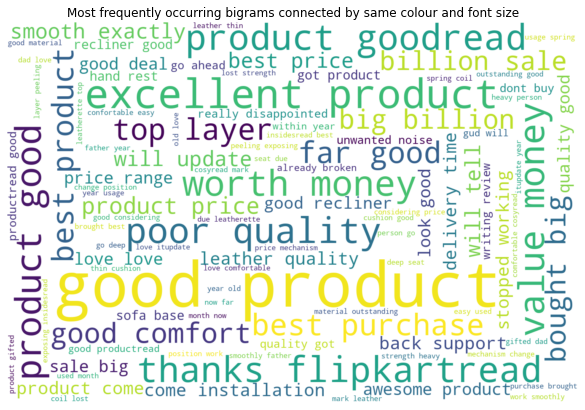

In [29]:
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(background_color='White',max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)

wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(15,7))
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## SENTIMENT ANALYSIS

Using the vader Sentiment library to do sentiment analysis of each reviews, which will give an idea about the positive or negative reception of the movie among the reviewers.

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Saving the reviews as list with in a list.

In [31]:
list_reviews=[]
for text in df['Review']:
    text=[text]
    list_reviews.append(text)
list_reviews

[['confortable easy used months now far good material outstanding good considering price mechanism change positions works smoothly father years old loves itupdate years usage spring coils lost strength heavy persons go deep seat due leatherette top layer peeling exposing insidesread'],
 ['good purchase brought good product gifted dad loves comfortable cosyread'],
 ['mark leather thin cushion good comfort good hope much durable bought big billion sale thanks flipkartread'],
 ['good product buyed dad loved much comfortable good product relaxationread'],
 ['good product price value money delivery installation smooth exactly per time frame far good time will tell products stands test time usage will update months usage paid rs via credit card offer now price buy price drops againread'],
 ['excellent product works perfectly defects found colour material looks rich royal anyone looking relaxing watching good footballcricket match product'],
 ['good product good price cost installation leathe

Using an empty list to store the polarity scores of each review, the final output will be a list of dictionaries.

In [32]:
empty=[]
for e in range(0,len(df.Review)):   
    v=list_reviews[e]
    for sentence in v:
        ss = sid.polarity_scores(sentence) 
        empty.append(ss)
print(empty)

[{'neg': 0.077, 'neu': 0.546, 'pos': 0.377, 'compound': 0.9517}, {'neg': 0.0, 'neu': 0.319, 'pos': 0.681, 'compound': 0.9153}, {'neg': 0.0, 'neu': 0.438, 'pos': 0.562, 'compound': 0.9201}, {'neg': 0.0, 'neu': 0.316, 'pos': 0.684, 'compound': 0.9186}, {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.8689}, {'neg': 0.081, 'neu': 0.39, 'pos': 0.529, 'compound': 0.9423}, {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.891}, {'neg': 0.074, 'neu': 0.558, 'pos': 0.368, 'compound': 0.9547}, {'neg': 0.0, 'neu': 0.327, 'pos': 0.673, 'compound': 0.8834}, {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.7003}, {'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'compound': 0.946}, {'neg': 0.048, 'neu': 0.714, 'pos': 0.237, 'compound': 0.8316}, {'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'compound': 0.9559}, {'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'compound': 0.9451}, {'neg': 0.0, 'neu': 0.404, 'pos': 0.596, 'compound': 0.9231}, {'neg': 0.0, 'neu': 0.456, 'pos': 0.544, 'compound': 0.9493}, {'

Storing the polarity scores in a dataframe.

In [33]:
df_sentiment=pd.DataFrame.from_dict(empty,orient='columns')
df_sentiment.head(5)

,neg,neu,pos,compound
0,0.077,0.546,0.377,0.9517
1,0.000,0.319,0.681,0.9153
2,0.000,0.438,0.562,0.9201
3,0.000,0.316,0.684,0.9186
4,0.000,0.759,0.241,0.8689


Concatenating both df and df_sentiment to get the reviews and its polarity scores in a single dataframe.

In [34]:
df_c=pd.concat([df['Review'],df_sentiment],axis=1)
df_c.head(5)

,Review,neg,neu,pos,compound
0,confortable easy used months now far good mate...,0.077,0.546,0.377,0.9517
1,good purchase brought good product gifted dad ...,0.000,0.319,0.681,0.9153
2,mark leather thin cushion good comfort good ho...,0.000,0.438,0.562,0.9201
3,good product buyed dad loved much comfortable ...,0.000,0.316,0.684,0.9186
4,good product price value money delivery instal...,0.000,0.759,0.241,0.8689


Converting the polarity scores into a positive or negative sentiment using the compound values. So if the compound value is zero or greater then the review is positive but if its less than zero its negative.

In [35]:
df_c['sentiment']=np.where(df_c['compound']>=0,'Positive','Negative')
df_c.head(5)

,Review,neg,neu,pos,compound,sentiment
0,confortable easy used months now far good mate...,0.077,0.546,0.377,0.9517,Positive
1,good purchase brought good product gifted dad ...,0.000,0.319,0.681,0.9153,Positive
2,mark leather thin cushion good comfort good ho...,0.000,0.438,0.562,0.9201,Positive
3,good product buyed dad loved much comfortable ...,0.000,0.316,0.684,0.9186,Positive
4,good product price value money delivery instal...,0.000,0.759,0.241,0.8689,Positive


Creating a bar chart to understand the sentiments of the reviewers.

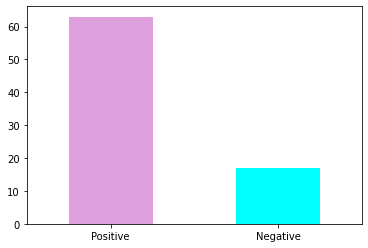

In [36]:
result=df_c['sentiment'].value_counts()
result.plot(kind='bar',rot=0,color=['plum','cyan']);

### CONCLUSION
From the sentiment analysis it is very clear that this product has mostly a positive response from customer , so now the manufacturers get an idea about the response of the product and gives a better idea on whether to bring in any changes or continue with the present product.